In [2]:
from astroutils.matplotlibrc import *
%pylab inline
from roche_q import calc_qr

Populating the interactive namespace from numpy and matplotlib


In [66]:
from scipy.interpolate import interp1d
from scipy.optimize import brentq

In [90]:
rcParams['font.size'] = 28
rcParams['xtick.major.pad']='8'

In [6]:
q, r = calc_qr()

In [48]:
roche_relationship = interp1d(q, r)

In [64]:
X = np.logspace(.45, .7)
Y0 = X**3 / 150

Y1 = X**3 / 40

In [77]:
# Find the intersection of the Roche lobe with the later mass-radius relationship
Xprime = brentq(lambda x: roche_relationship(x) - x**3 / 40, 1, 10)

# Find the initial radius of this star
Yprime0 = Xprime**3 / 150
Yprime1 = Xprime**3 / 40

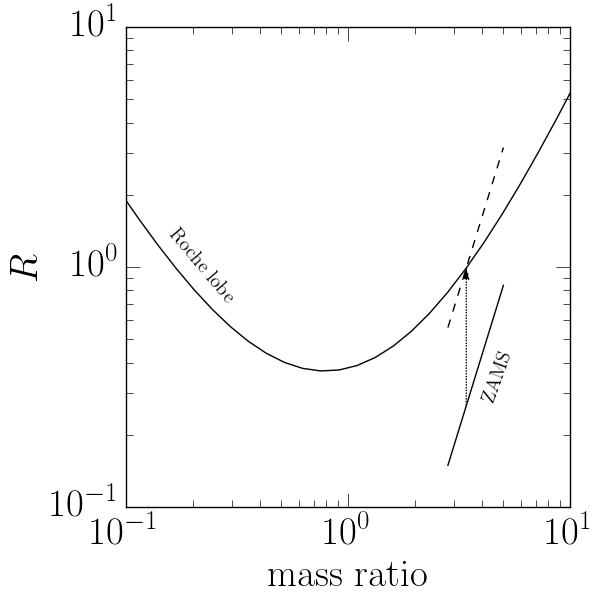

In [102]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0.21, 0.15, 0.74, 0.8])

ax.plot(q, r, c='k')
ax.set_xlim([.1, 10])
ax.set_ylim([.1, 10])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'mass ratio')
ax.set_ylabel(r'$R$')

ax.plot(X, Y0, c='k')
ax.plot(X, Y1, c='k', linestyle='--')

# Add an arrow going up
ax.arrow(Xprime, Yprime0, 0, Yprime1 - Yprime0, color='k', head_width=.2, head_length=.1, 
         length_includes_head=True, linestyle=':');

ax.text(.15, 1.3, 'Roche lobe', fontsize=14, rotation=-50)
ax.text(4, .4, 'ZAMS', fontsize=14, rotation=70)
plt.savefig('mass_radius1.png')